<a href="https://colab.research.google.com/github/rrankawat/linear-regression/blob/main/3_Custom_Modules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'X')

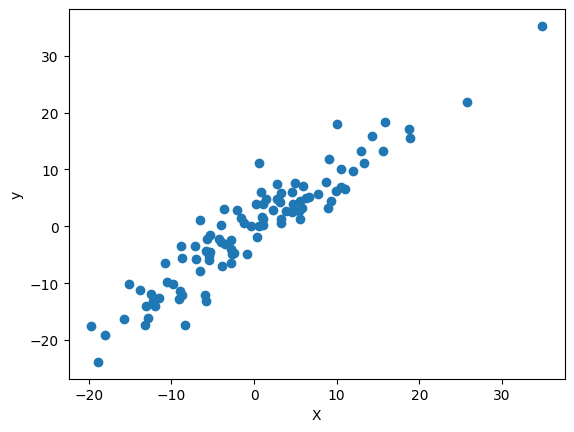

In [2]:
X = torch.randn(100, 1)*10
y = X + 3*torch.randn(100, 1)
# print(X)

plt.plot(X, y, 'o')
plt.ylabel('y')
plt.xlabel('X')

In [3]:
class LinearRegression(nn.Module):
  def __init__(self, input_size, output_size): # self - instance of the class (object that yet to be init)
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)

  # To make predictions
  def forward(self, x):
    pred = self.linear(x)
    return pred

In [4]:
torch.manual_seed(1)
model = LinearRegression(1, 1)
# print(model)

In [5]:
[w, b] = model.parameters()
# w1 = w[0][0].item()
# b1 = b[0].item()
# print(w1, b1)

def get_params():
  return (w[0][0].item(), b[0].item())

In [6]:
def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30, 30])
  y1 = w1*x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X, y)
  plt.show()

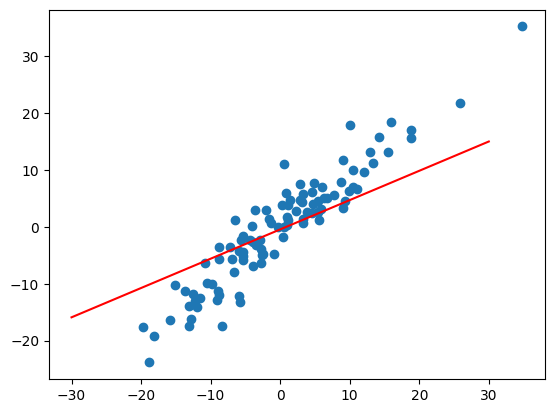

In [7]:
plot_fit('Initial Model')

In [8]:
# Mean squared loss
criterion = nn.MSELoss()

# Optimizer to update params
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [9]:
# Model Training
epochs = 100
losses = []

for i in range(epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred, y)
  print("epoch: ", i, "loss: ", loss.item())

  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch:  0 loss:  30.486000061035156
epoch:  1 loss:  26.489173889160156
epoch:  2 loss:  23.323314666748047
epoch:  3 loss:  20.815513610839844
epoch:  4 loss:  18.828826904296875
epoch:  5 loss:  17.254838943481445
epoch:  6 loss:  16.007701873779297
epoch:  7 loss:  15.019403457641602
epoch:  8 loss:  14.236096382141113
epoch:  9 loss:  13.615150451660156
epoch:  10 loss:  13.12280559539795
epoch:  11 loss:  12.732314109802246
epoch:  12 loss:  12.422504425048828
epoch:  13 loss:  12.17660903930664
epoch:  14 loss:  11.981348037719727
epoch:  15 loss:  11.826201438903809
epoch:  16 loss:  11.70284652709961
epoch:  17 loss:  11.604681015014648
epoch:  18 loss:  11.526485443115234
epoch:  19 loss:  11.464118957519531
epoch:  20 loss:  11.414306640625
epoch:  21 loss:  11.374451637268066
epoch:  22 loss:  11.342498779296875
epoch:  23 loss:  11.316815376281738
epoch:  24 loss:  11.296116828918457
epoch:  25 loss:  11.279376029968262
epoch:  26 loss:  11.265786170959473
epoch:  27 loss: 

Text(0.5, 0, 'epoch')

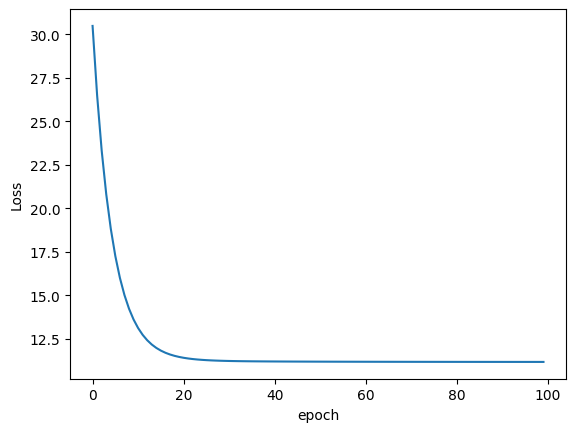

In [11]:
plt.plot(range(epochs), [loss.detach().numpy() for loss in losses])
plt.ylabel('Loss')
plt.xlabel('epoch')

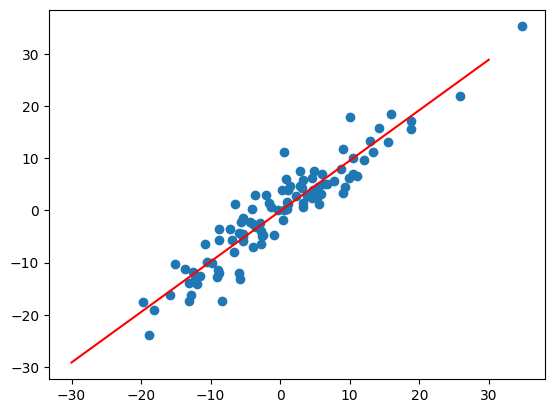

In [12]:
plot_fit('Trained Model')